In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [2]:
img_array = cv2.imread("Research DB/Emotions/0/angry69_mirror_resized.jpg")

In [3]:
img_array.shape

(224, 224, 3)

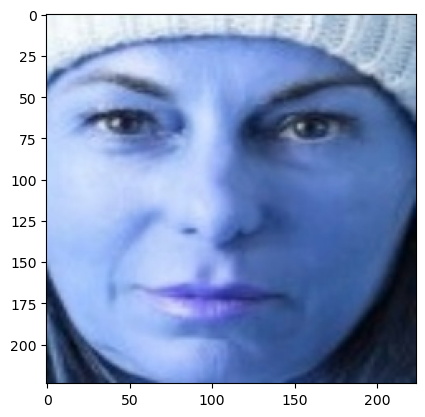

In [4]:
plt.imshow(img_array)

In [5]:
data_directory = "Research DB/Emotions/"

In [6]:
Classes = ["0","1","2","3","4","5"]

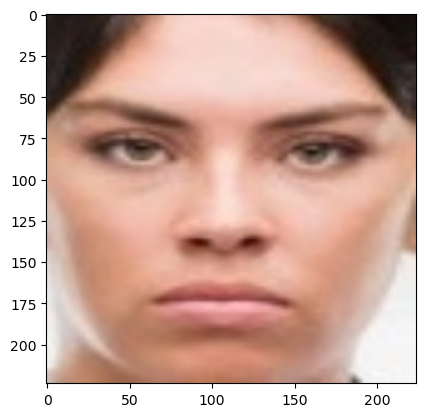

In [7]:
for category in Classes:
  path = os.path.join(data_directory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

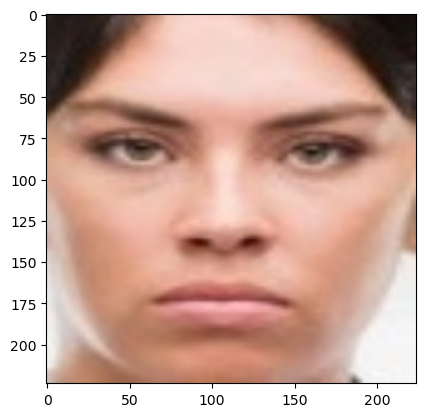

In [8]:
img_size = 224
new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(data_directory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [11]:
create_training_data()

In [12]:
print(len(training_data))

768


In [13]:
temp = np.array(training_data)

C:\Users\Nisal Daksith\AppData\Local\Temp\ipykernel_10124\645717107.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_data)


In [14]:
temp.shape

(768, 2)

In [15]:
random.shuffle(training_data)

In [16]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size, 3)

In [17]:
x.shape

(768, 224, 224, 3)

In [18]:
x = x/255.0 

In [19]:
y[767]

2

In [20]:
y = np.array(y)

In [21]:
y.shape

(768,)

In [22]:
###### Transfer Learning

In [23]:
model = tf.keras.applications.MobileNetV2() ### Pre trained model

In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [25]:
base_input = model.layers[0].input

In [26]:
base_output = model.layers[-2].output

In [27]:
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [29]:
final_output_1 = layers.Dense(128)(base_output)
final_output_2 = layers.Activation('relu')(final_output_1)
final_output_3 = layers.Dense(64)(final_output_2)
final_output_4 = layers.Activation('relu')(final_output_3)
final_output_5 = layers.Dense(7, activation = 'softmax')(final_output_4)

In [30]:
final_output_5

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
emotion_identifier = keras.Model(inputs = base_input, outputs = final_output_5)

In [32]:
emotion_identifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [33]:
emotion_identifier.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]) 

In [34]:
emotion_identifier.fit(x,y, epochs = 15)

Epoch 1/15
24/24 [==============================] - 28s 971ms/step - loss: 0.8493 - accuracy: 0.7109
Epoch 2/15
24/24 [==============================] - 22s 917ms/step - loss: 0.3352 - accuracy: 0.8919
Epoch 3/15
24/24 [==============================] - 22s 899ms/step - loss: 0.2618 - accuracy: 0.9154
Epoch 4/15
24/24 [==============================] - 20s 833ms/step - loss: 0.1959 - accuracy: 0.9336
Epoch 5/15
24/24 [==============================] - 20s 826ms/step - loss: 0.1744 - accuracy: 0.9544
Epoch 6/15
24/24 [==============================] - 22s 911ms/step - loss: 0.1228 - accuracy: 0.9688
Epoch 7/15
24/24 [==============================] - 22s 927ms/step - loss: 0.0806 - accuracy: 0.9766
Epoch 8/15
24/24 [==============================] - 21s 866ms/step - loss: 0.1503 - accuracy: 0.9596
Epoch 9/15
24/24 [==============================] - 23s 978ms/step - loss: 0.0787 - accuracy: 0.9740
Epoch 10/15
24/24 [==============================] - 24s 981ms/step - loss: 0.0557 - accura

In [35]:
emotion_identifier.save("emotion_identifier_model_1.h5")

In [36]:
emotion_identifier = tf.keras.models.load_model('emotion_identifier_model_1.h5')